# DATA MINING 

## Kelompok 4

- Siti Hafshah Nurul Arafah (11160940000083)
- Amel Andrisa Alpa (11160940000055)
- Astri Apriliya (11160940000081)
- Etih Supriatna (11160940000060)
- Ibrahim Farhan (11170940000043)
- Fatih Al Gusda P (11170940000050)
- Adrian Fajar (11170940000036)
- Fany Andisa (11170940000021)
- Yulisnawati (11170940000005)

### Data 1

In [1]:
%matplotlib inline
import warnings; warnings.simplefilter('ignore')
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

plt.style.use('bmh'); sns.set()

In [2]:
Data_Covid = pd.read_csv('C:/Users/Amellia Andrisa Alpa/Downloads/Data M/Daily-Update IDN-COVID19 - Sheet5.csv')
Data_Covid1 = pd.read_csv('C:/Users/Amellia Andrisa Alpa/Downloads/Data M/Case by Provinces - IDN-COVID19 - Sheet2.csv')

In [3]:
Data_Covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 10 columns):
Day                        40 non-null int64
Date                       40 non-null object
Daily_cases                40 non-null int64
Cumulative_cases           40 non-null int64
Patient_under_treatment    40 non-null int64
Recovered_cases            32 non-null float64
Total_death                31 non-null float64
Recovered-cases_perDay     32 non-null float64
Death_cases_perDay         31 non-null float64
Treatment_cases_perDay     36 non-null float64
dtypes: float64(5), int64(4), object(1)
memory usage: 3.2+ KB


In [4]:
Data_Covid.head(10)

,Day,Date,Daily_cases,Cumulative_cases,Patient_under_treatment,Recovered_cases,Total_death,Recovered-cases_perDay,Death_cases_perDay,Treatment_cases_perDay
0,1,2020-03-02T00:00:00.000Z,2,2,2,NaN,NaN,NaN,NaN,NaN
1,2,2020-03-03T00:00:00.000Z,2,2,2,NaN,NaN,NaN,NaN,NaN
2,3,2020-03-04T00:00:00.000Z,2,2,2,NaN,NaN,NaN,NaN,NaN
3,4,2020-03-05T00:00:00.000Z,2,2,2,NaN,NaN,NaN,NaN,NaN
4,5,2020-03-06T00:00:00.000Z,2,4,4,NaN,NaN,NaN,NaN,2.0
5,6,2020-03-07T00:00:00.000Z,2,4,4,NaN,NaN,NaN,NaN,2.0
6,7,2020-03-08T00:00:00.000Z,2,6,6,NaN,NaN,NaN,NaN,2.0
7,8,2020-03-09T00:00:00.000Z,13,19,19,NaN,NaN,NaN,NaN,13.0
8,9,2020-03-10T00:00:00.000Z,8,27,25,2.0,NaN,2.0,NaN,6.0
9,10,2020-03-11T00:00:00.000Z,7,34,31,2.0,1.0,2.0,1.0,6.0


In [5]:
Data_Covid.tail(7)

,Day,Date,Daily_cases,Cumulative_cases,Patient_under_treatment,Recovered_cases,Total_death,Recovered-cases_perDay,Death_cases_perDay,Treatment_cases_perDay
33,34,2020-04-04T00:00:00.000Z,106,2092,1751,150.0,191.0,16.0,10.0,80.0
34,35,2020-04-05T00:00:00.000Z,181,2273,1911,164.0,198.0,14.0,7.0,160.0
35,36,2020-04-06T00:00:00.000Z,218,2491,2090,192.0,209.0,28.0,11.0,179.0
36,37,2020-04-07T00:00:00.000Z,247,2738,2313,204.0,221.0,12.0,12.0,223.0
37,38,2020-04-08T00:00:00.000Z,218,2956,2494,222.0,240.0,18.0,19.0,181.0
38,39,2020-04-09T00:00:00.000Z,337,3293,2761,252.0,280.0,30.0,40.0,267.0
39,40,2020-04-10T00:00:00.000Z,219,3512,2924,282.0,306.0,30.0,26.0,163.0


In [6]:
Data_Covid.describe()

,Day,Daily_cases,Cumulative_cases,Patient_under_treatment,Recovered_cases,Total_death,Recovered-cases_perDay,Death_cases_perDay,Treatment_cases_perDay
count,40.000000,40.000000,40.000000,40.000000,32.000000,31.000000,32.000000,31.000000,36.000000
mean,20.500000,88.175000,919.375000,780.850000,74.968750,101.354839,9.406250,10.000000,81.388889
std,11.690452,83.412748,1047.325769,878.411315,82.202929,91.432142,8.893127,8.698659,67.751343
min,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000
25%,10.750000,11.750000,34.000000,31.000000,10.500000,22.000000,2.000000,3.000000,20.750000
50%,20.500000,73.000000,482.000000,414.500000,33.000000,78.000000,6.000000,9.000000,75.500000
75%,30.250000,129.250000,1565.250000,1337.500000,117.500000,175.500000,13.250000,13.500000,110.750000
max,40.000000,337.000000,3512.000000,2924.000000,282.000000,306.000000,30.000000,40.000000,267.000000


In [7]:
Data_Covid.dtypes

Day                          int64
Date                        object
Daily_cases                  int64
Cumulative_cases             int64
Patient_under_treatment      int64
Recovered_cases            float64
Total_death                float64
Recovered-cases_perDay     float64
Death_cases_perDay         float64
Treatment_cases_perDay     float64
dtype: object

In [8]:
Data_Covid.drop(columns=['Day'],inplace=True)
Data_Covid['Date']=Data_Covid['Date'].astype('datetime64')

In [9]:
Data_Covid.dtypes

Date                       datetime64[ns]
Daily_cases                         int64
Cumulative_cases                    int64
Patient_under_treatment             int64
Recovered_cases                   float64
Total_death                       float64
Recovered-cases_perDay            float64
Death_cases_perDay                float64
Treatment_cases_perDay            float64
dtype: object

In [10]:
Data_Covid.describe(include='all')

,Date,Daily_cases,Cumulative_cases,Patient_under_treatment,Recovered_cases,Total_death,Recovered-cases_perDay,Death_cases_perDay,Treatment_cases_perDay
count,40,40.000000,40.000000,40.000000,32.000000,31.000000,32.000000,31.000000,36.000000
unique,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2020-03-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2020-03-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2020-04-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,88.175000,919.375000,780.850000,74.968750,101.354839,9.406250,10.000000,81.388889
std,NaN,83.412748,1047.325769,878.411315,82.202929,91.432142,8.893127,8.698659,67.751343
min,NaN,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000
25%,NaN,11.750000,34.000000,31.000000,10.500000,22.000000,2.000000,3.000000,20.750000


In [11]:
#Mengecek missing value pada data 
Data_Covid.isnull().sum()

Date                       0
Daily_cases                0
Cumulative_cases           0
Patient_under_treatment    0
Recovered_cases            8
Total_death                9
Recovered-cases_perDay     8
Death_cases_perDay         9
Treatment_cases_perDay     4
dtype: int64

In [12]:
Data_Covid = Data_Covid.fillna(0)

In [13]:
Data_Covid.isnull().sum()

Date                       0
Daily_cases                0
Cumulative_cases           0
Patient_under_treatment    0
Recovered_cases            0
Total_death                0
Recovered-cases_perDay     0
Death_cases_perDay         0
Treatment_cases_perDay     0
dtype: int64

In [14]:
Data_Covid.head(10)

,Date,Daily_cases,Cumulative_cases,Patient_under_treatment,Recovered_cases,Total_death,Recovered-cases_perDay,Death_cases_perDay,Treatment_cases_perDay
0,2020-03-02,2,2,2,0.0,0.0,0.0,0.0,0.0
1,2020-03-03,2,2,2,0.0,0.0,0.0,0.0,0.0
2,2020-03-04,2,2,2,0.0,0.0,0.0,0.0,0.0
3,2020-03-05,2,2,2,0.0,0.0,0.0,0.0,0.0
4,2020-03-06,2,4,4,0.0,0.0,0.0,0.0,2.0
5,2020-03-07,2,4,4,0.0,0.0,0.0,0.0,2.0
6,2020-03-08,2,6,6,0.0,0.0,0.0,0.0,2.0
7,2020-03-09,13,19,19,0.0,0.0,0.0,0.0,13.0
8,2020-03-10,8,27,25,2.0,0.0,2.0,0.0,6.0
9,2020-03-11,7,34,31,2.0,1.0,2.0,1.0,6.0


## Melihat kecenderungan total kematian dari kasus yang positif pada setiap harinya

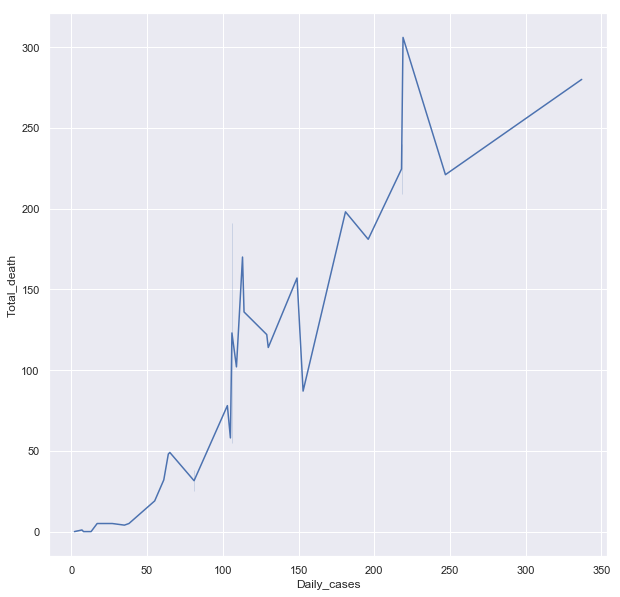

In [34]:
plt.figure(figsize=(10,10))
p = sns.lineplot(x="Daily_cases", y = "Total_death", data = Data_Covid)

Berdasarkan plot diatas bahwa kasus kematian t....

#### Mengecek Outlier

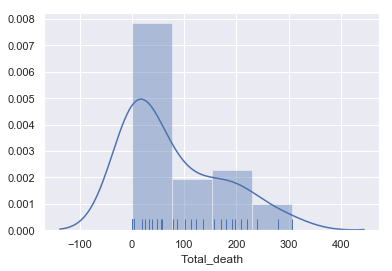

In [16]:
#Distributions
p = sns.distplot(Data_Covid['Total_death'], kde=True, rug=True)

In [17]:
df = np.abs(Data_Covid.Total_death - Data_Covid.Total_death.mean())<=(2*Data_Covid.Total_death.std())
# mu-2s<x<mu+2s
print(df.shape)
df.head()

(40,)


0    True
1    True
2    True
3    True
4    True
Name: Total_death, dtype: bool

In [18]:
Data_Covid2 = Data_Covid[df] # Data tanpa outliers
print(Data_Covid2.shape, Data_Covid.shape)
Data_Covid2.head

(38, 9) (40, 9)


<bound method NDFrame.head of          Date  Daily_cases  Cumulative_cases  Patient_under_treatment  \
0  2020-03-02            2                 2                        2   
1  2020-03-03            2                 2                        2   
2  2020-03-04            2                 2                        2   
3  2020-03-05            2                 2                        2   
4  2020-03-06            2                 4                        4   
5  2020-03-07            2                 4                        4   
6  2020-03-08            2                 6                        6   
7  2020-03-09           13                19                       19   
8  2020-03-10            8                27                       25   
9  2020-03-11            7                34                       31   
10 2020-03-12            7                34                       31   
11 2020-03-13           35                69                       63   
12 2020-03-14        

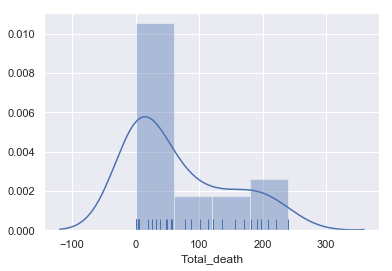

In [19]:
# Distributions
p = sns.distplot(Data_Covid2['Total_death'], kde=True, rug=True)

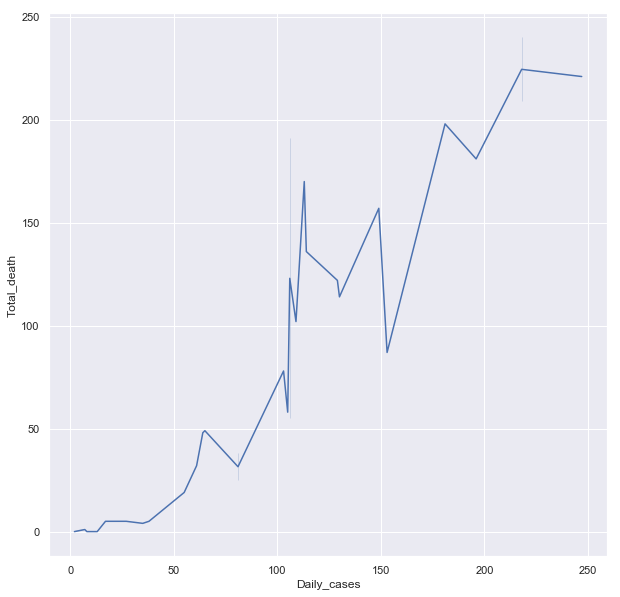

In [30]:
plt.figure(figsize=(10,10)) #menggunakan data tanpa outlier
p = sns.lineplot(x="Daily_cases", y = "Total_death", data = Data_Covid2)

Berdasarkan plot diatas, jumlah kematian meningkat dari kasus yang positif pada setiap harinya cenderung naik turun, dikarenakan berdasarkan data yang ada cukup banyak pasien yang dinyatakan positif juga mendapatkan perawatan dan  sembuh.

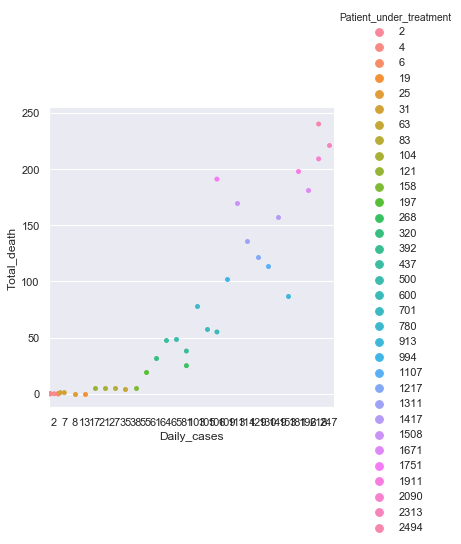

In [21]:
p= sns.catplot(x="Daily_cases", y="Total_death", hue="Patient_under_treatment", kind="swarm", data=Data_Covid2)

## Melihat kecenderungan total kematian dari kasus pasien yang dirawat

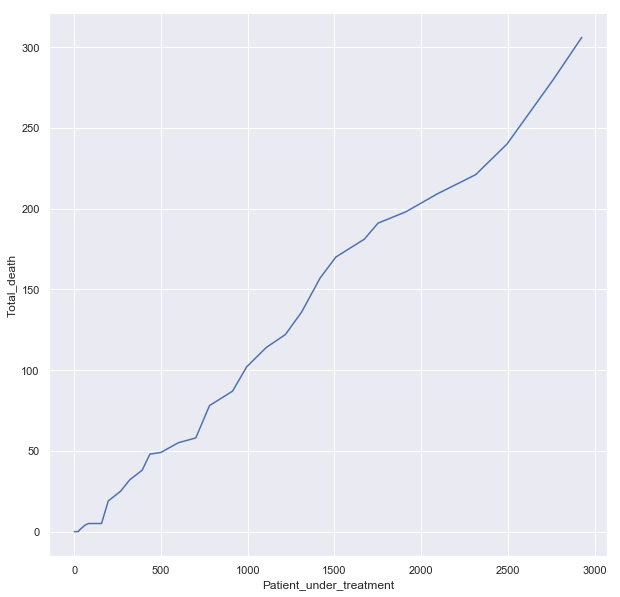

In [31]:
plt.figure(figsize=(10,10))
p = sns.lineplot(x="Patient_under_treatment", y = "Total_death", data = Data_Covid)

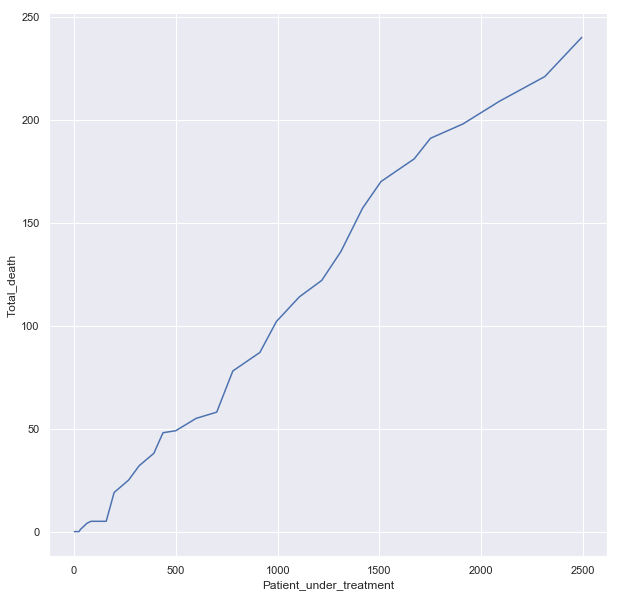

In [32]:
plt.figure(figsize=(10,10)) #menggunakan data tanpa outlier
p = sns.lineplot(x="Patient_under_treatment", y = "Total_death", data = Data_Covid2)

Berdasarkan Berdasarkan plot diatas, meski jumlah kematian meningkat, tidak dipungkiri bahwa jumlah kasus yang pasien yg dirawat meningkat dikarenakan berdasarkan data yang ada cukup banyak pasien yang dinyatakan positif setiap harinya.

## Melihat kecenderungan total kematian dari kasus pasien yang sembuh

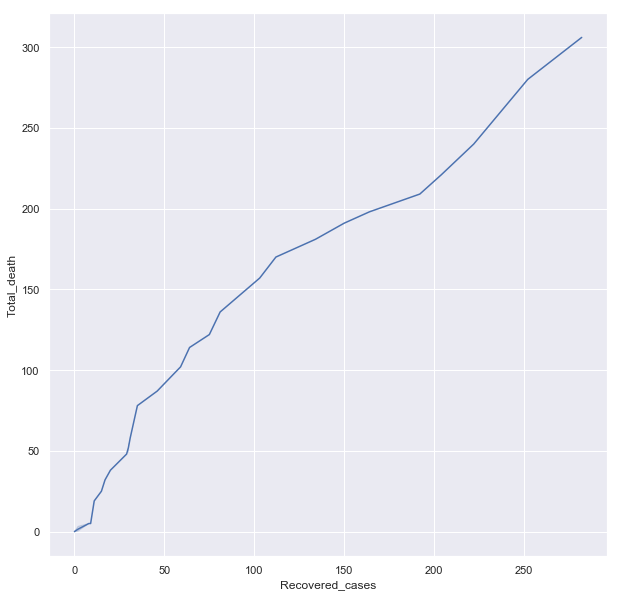

In [33]:
plt.figure(figsize=(10,10))
p = sns.lineplot(x="Recovered_cases", y = "Total_death", data = Data_Covid)

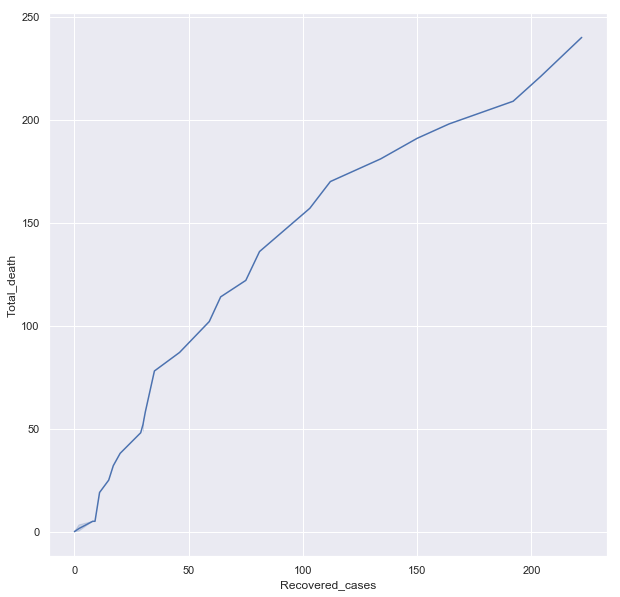

In [29]:
plt.figure(figsize=(10,10)) #menggunakan data tanpa outlier
p = sns.lineplot(x="Recovered_cases", y = "Total_death", data = Data_Covid2)

Berdasarkan plot diatas, meski jumlah kematian meningkat, tidak dipungkiri bahwa jumlah kasus yang sembuh meningkat dikarenakan berdasarkan data yang ada cukup banyak pasien yang positif tertangani untuk dirawat.

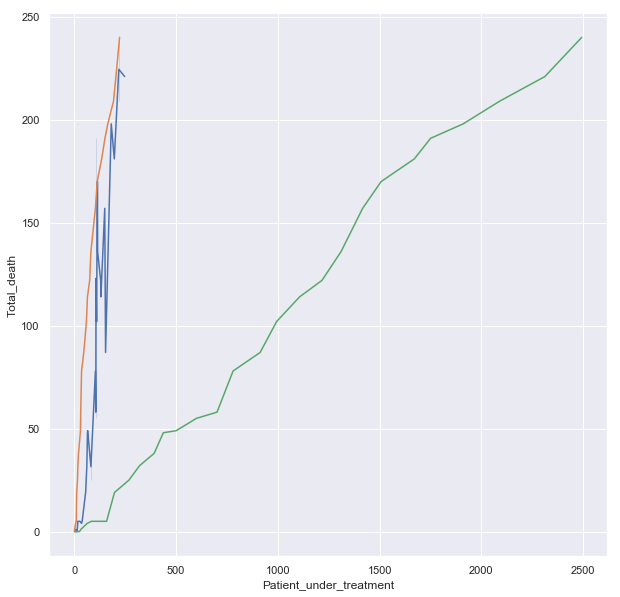

In [35]:
plt.figure(figsize=(10,10))
p = sns.lineplot(x="Daily_cases", y = "Total_death", data = Data_Covid2)
p = sns.lineplot(x="Recovered_cases", y = "Total_death", data = Data_Covid2)
p = sns.lineplot(x="Patient_under_treatment", y = "Total_death", data = Data_Covid2)

In [27]:
#Mengecek Korelasi antar variabel
Data_Covid2.corr()

,Daily_cases,Cumulative_cases,Patient_under_treatment,Recovered_cases,Total_death,Recovered-cases_perDay,Death_cases_perDay,Treatment_cases_perDay
Daily_cases,1.000000,0.943947,0.946658,0.905508,0.932907,0.804573,0.755224,0.994229
Cumulative_cases,0.943947,1.000000,0.999892,0.983868,0.996791,0.837376,0.737051,0.926128
Patient_under_treatment,0.946658,0.999892,1.000000,0.981524,0.996436,0.834560,0.740669,0.929287
Recovered_cases,0.905508,0.983868,0.981524,1.000000,0.975855,0.842372,0.661085,0.888878
Total_death,0.932907,0.996791,0.996436,0.975855,1.000000,0.845752,0.751982,0.910082
Recovered-cases_perDay,0.804573,0.837376,0.834560,0.842372,0.845752,1.000000,0.662438,0.755566
Death_cases_perDay,0.755224,0.737051,0.740669,0.661085,0.751982,0.662438,1.000000,0.697677
Treatment_cases_perDay,0.994229,0.926128,0.929287,0.888878,0.910082,0.755566,0.697677,1.000000


Berdasarkan plot dan tabel korelasi diatas,

Dapat disimpulkan bahwa tingkat kematian yang semakin meningkat dipengaruhi atas Daily_cases (pasien yang positif) nya gagal untuk segera mendapatkan perawatan atau jika mendapatkan perawatan sekalipun yaitu yg berstatus Patient_under_treatment gagal untuk disembuhkan. Namun, meskipun begitu tidak dipungkiri bahwa jumlah yang sembuh tetap meningkat.